### Cluster Analysis
---

Naval Engine Data (Kaggle)

In [1]:
# Dependencies
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering, AffinityPropagation

sns.set()

In [2]:
# Import and split data sets
heads = [i.split('-')[1] for i in pd.read_csv(r'input\features.txt', header = None)[0]]
df_raw = pd.read_csv(r'input\data.txt', delimiter = '\s+', names = heads)

---
#### Explore Data

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0    Lever position (lp) [ ]                        11934 non-null  float64
 1    Ship speed (v) [knots]                         11934 non-null  float64
 2    Gas Turbine shaft torque (GTT) [kN m]          11934 non-null  float64
 3    Gas Turbine rate of revolutions (GTn) [rpm]    11934 non-null  float64
 4    Gas Generator rate of revolutions (GGn) [rpm]  11934 non-null  float64
 5    Starboard Propeller Torque (Ts) [kN]           11934 non-null  float64
 6    Port Propeller Torque (Tp) [kN]                11934 non-null  float64
 7    HP Turbine exit temperature (T48) [C]          11934 non-null  float64
 8    GT Compressor inlet air temperature (T1) [C]   11934 non-null  float64
 9    GT Compressor outlet air temperature (

In [4]:
df_raw.sample(5)

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
5819,6.175,18.0,29792.603,2307.368,8825.026,246.215,246.215,763.681,288.0,665.668,2.503,0.998,13.103,1.031,33.559,0.664,0.974,0.997
11719,2.088,6.0,4297.975,1392.329,6734.967,31.098,31.098,532.050,288.0,561.179,1.257,0.998,6.826,1.020,0.000,0.165,1.000,0.977
965,3.144,9.0,8379.071,1386.756,7110.305,60.353,60.353,601.637,288.0,586.245,1.389,0.998,7.554,1.020,12.915,0.256,0.954,0.978
983,3.144,9.0,8379.326,1386.758,7115.471,60.360,60.360,599.989,288.0,585.947,1.389,0.998,7.539,1.020,12.847,0.254,0.954,0.980
7303,5.140,15.0,21627.486,1924.313,8469.682,175.249,175.249,710.081,288.0,637.020,2.087,0.998,11.186,1.026,25.348,0.502,0.981,0.980


In [5]:
df_raw.describe()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


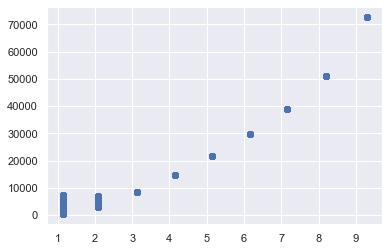

In [20]:
plt.scatter(df_raw.iloc[:, 0], df_raw.iloc[:, 2])

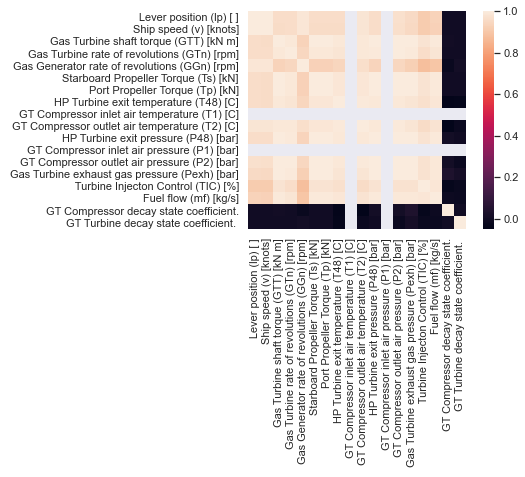

In [7]:
# Correlations
cor = df_raw.corr()
sns.heatmap(cor, square = True);

# final two columns are skewing results of others - plot without below

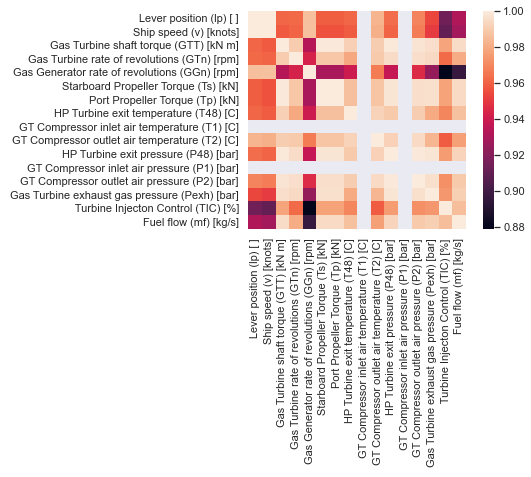

In [8]:
# Correlations less efficiency coeff and decay coeff
cor = df_raw.iloc[:, :-2].corr()
sns.heatmap(cor, square = True);

# As shown in the heatmap there are a range of strong connections across this data - let's apply clustering to invetigate further

---
#### Cluster Analysis

In [9]:
# Normalise data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_raw))
df_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.000,0.000502,0.018559,0.027548,0.003563,0.003563,0.032137,0.0,0.040703,0.000865,0.0,0.006874,0.000000,0.077110,0.007937,0.0,0.0
1,0.116393,0.125,0.092465,0.030399,0.074644,0.035784,0.035784,0.286646,0.0,0.165758,0.068647,0.0,0.083988,0.000000,0.115119,0.124150,0.0,0.0
2,0.245773,0.250,0.112030,0.035100,0.162965,0.086029,0.086029,0.242991,0.0,0.189602,0.085376,0.0,0.100855,0.030303,0.141385,0.108277,0.0,0.0
3,0.370375,0.375,0.199512,0.106428,0.375184,0.169499,0.169499,0.325358,0.0,0.295228,0.162965,0.0,0.183630,0.090909,0.195655,0.164399,0.0,0.0
4,0.490321,0.500,0.294809,0.273688,0.594051,0.265651,0.265651,0.429337,0.0,0.423081,0.284107,0.0,0.310132,0.212121,0.284941,0.257370,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,0.490321,0.500,0.294650,0.273701,0.586332,0.265546,0.265546,0.355335,0.0,0.355951,0.286703,0.0,0.298175,0.242424,0.257174,0.228458,1.0,1.0
11930,0.617128,0.625,0.406854,0.443427,0.689302,0.376048,0.376048,0.452964,0.0,0.476212,0.409288,0.0,0.420575,0.363636,0.352986,0.328231,1.0,1.0
11931,0.736339,0.750,0.534256,0.608228,0.789217,0.511114,0.511114,0.525803,0.0,0.562839,0.544851,0.0,0.554067,0.515152,0.454903,0.434240,1.0,1.0
11932,0.865964,0.875,0.699546,0.789928,0.845133,0.676183,0.676183,0.669081,0.0,0.730286,0.721373,0.0,0.720021,0.727273,0.627339,0.612812,1.0,1.0


In [10]:
# Clustering Function
def clusterAnalysis(X, clusters_n, method):

    if method.__name__ in ['KMeans']:
        model = method(n_clusters = clusters_n, random_state = 88)
        model.fit_predict(X)
        
        clust_labels = model.labels_
        cent = model.cluster_centers_
        
        return (clust_labels, cent)

    if method.__name__ in ['AgglomerativeClustering']:
        model = method(n_clusters = clusters_n)
        clust_labels = model.fit_predict(X)
        
        return clust_labels

    if method.__name__ in ['AffinityPropagation']:
        model = method(damping = 0.88, random_state = 88)
        model.fit_predict(X)
        
        clust_labels = model.labels_
        cent = model.cluster_centers_
        
        return (clust_labels, cent)

    if method.__name__ in ['DBSCAN', 'OPTICS']:
        model = method()
        clust_labels = model.fit_predict(X)
        
        return clust_labels

In [11]:
# Test function
kMeans = clusterAnalysis(df_norm, 8, KMeans)
df_raw['KMeans'] = pd.Series(kMeans[0], name = 'KMeans')

df_raw.sample(3)

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.,KMeans
1625,6.175,18.0,29797.907,2307.220,8846.547,246.365,246.365,770.923,288.0,669.628,2.495,0.998,13.041,1.030,33.883,0.671,0.956,0.999,0
1436,6.175,18.0,29791.855,2307.431,8824.893,246.202,246.202,793.822,288.0,674.230,2.503,0.998,13.326,1.030,35.384,0.701,0.956,0.978,0
3150,1.138,3.0,2856.373,1414.549,6724.528,11.354,11.354,525.670,288.0,560.880,1.203,0.998,6.472,1.019,0.000,0.152,0.963,0.987,1


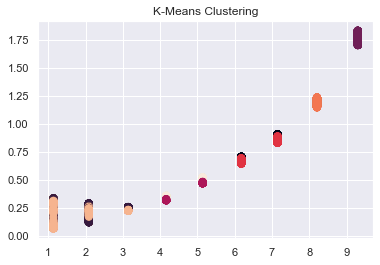

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(kMeans[0].max()+1):
    scatter = ax.scatter(df_raw.iloc[:, 0], df_raw.iloc[:, -4], c = kMeans[0], s = 50)
    ax.set_title('K-Means Clustering')
    

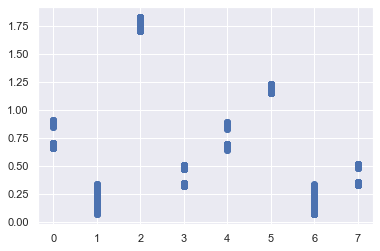

In [31]:
plt.scatter(x = df_raw['KMeans'], y = df_raw.iloc[:, -4])